In [ ]:
import numpy as np
from scipy.stats import weibull_min
from numpy import exp
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=1234)

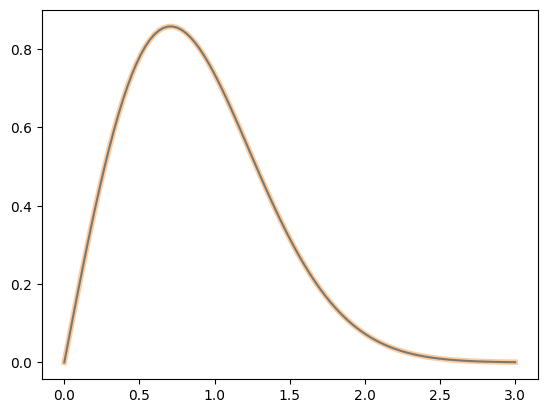

In [ ]:
r = 2; scale=1
x = np.linspace(0, 3, 101)
plt.plot(x, weibull_min.pdf(x, c=r, scale=scale))
plt.plot(x, r * x**(r-1) * exp(-x**r) / scale,
 lw=4, alpha=0.4)

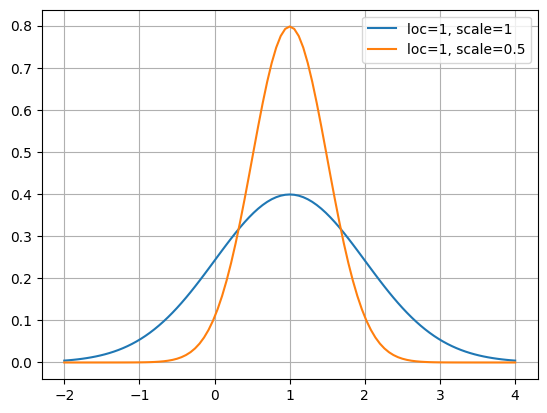

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
xx = np.linspace(-2, 4, 101)
plt.plot(xx, norm.pdf(xx, loc=1), label='loc=%s, scale=%s'%(1, 1))
plt.plot(xx, norm.pdf(xx, loc=1, scale=0.5),
         label='loc=%s, scale=%s'%(1, 0.5))
plt.grid()
plt.legend(loc='best')

In [ ]:
rng.uniform(size=4)
#array([0.17748 , 0.18344591, 0.42800468, 0.83810427])


array([0.97669977, 0.38019574, 0.92324623, 0.26169242])

In [ ]:
Y = rng.uniform(size=10)
X = -np.log(1 - Y)

In [ ]:
N = 30

rng = np.random.default_rng(1235)
X_weib = weibull_min.rvs(c=1, size=30, random_state=rng)
rng = np.random.default_rng(1235)
Y = rng.uniform(size=30)
X_inv = -np.log(1. - Y)

In [ ]:
np.allclose(X_inv, X_weib, atol=1e-15)

True

In [ ]:
X = X_weib.copy()
X.sort()
X

array([0.03137465, 0.04531734, 0.06544178, 0.12135278, 0.1791247 ,
       0.19538249, 0.20266212, 0.30067117, 0.31516295, 0.31756893,
       0.34691501, 0.34702768, 0.41694743, 0.43383668, 0.50926666,
       0.53299031, 0.53517583, 0.55862447, 0.88995173, 0.89984881,
       1.04866232, 1.07977963, 1.13848816, 1.17957629, 1.33374016,
       1.33785406, 1.35656268, 1.7545202 , 1.82080282, 1.89182818])

In [ ]:
from scipy.special import gamma
scale = X.sum() / X.size
scale /= gamma(2)


In [ ]:
c, loc, scale = weibull_min.fit(X)
print(c, loc, scale)

0.9768878353509471 0.031374654994178505 0.6711446161598695


In [ ]:
c, loc,scale = weibull_min.fit(X, floc=0, fc=1)
print(c, loc, scale)


1 0 0.7061934277849369


In [ ]:
alpha = 0.01
from scipy.stats import norm
from scipy.special import gamma
import math
quantile = norm.isf(alpha/2.)
c = 1
sigma = math.sqrt(gamma(1 + 2./c) - gamma(1 + 1./c)**2)
# sample mean
X_av = X.sum() / X.size
# confidence interval
delta = quantile * sigma / math.sqrt(X.size)
print("quantile =", quantile, " (alpha =", alpha, ")")
print("W(1, 1) mean = ", weibull_min.mean(c=1))
print("sample mean = ", X_av)
print("conf interval : (%s, %s)" %
 (X_av - delta, X_av + delta))

quantile = 2.575829303548901  (alpha = 0.01 )
W(1, 1) mean =  1.0
sample mean =  0.7062152673154556
conf interval : (0.23593532936993733, 1.1764952052609738)


In [ ]:
sigma = np.std(X, ddof=1)
delta = quantile*sigma / math.sqrt(X.size)
print("quantile =", quantile, " (alpha =", alpha, ")")
print("W(1, 1) mean = ", weibull_min.mean(c=1))
print("sample mean = ", X_av)
print("conf interval : (%s, %s)" % (X_av - delta, X_av + delta))


quantile = 2.575829303548901  (alpha = 0.01 )
W(1, 1) mean =  1.0
sample mean =  0.7062152673154556
conf interval : (0.4421546911230458, 0.9702758435078653)


In [ ]:
z1, z2 = weibull_min.ppf([1/3, 2/3], c=1)
print(z1, z2)

0.4054651081081643 1.0986122886681096


In [ ]:
n1 = np.count_nonzero(X < z1)
n2 = np.count_nonzero((z1 <= X) & (X < z2))
n3 = np.count_nonzero(z2 <= X)
obs_freq = np.array([n1, n2, n3])
obs_freq

array([12, 10,  8])

In [ ]:
exp_freq = 10
K = np.sum((obs_freq - exp_freq)**2) / exp_freq
print(K)

0.8


In [ ]:
alpha=0.1
from scipy.stats import chi2
k_c = chi2.isf(alpha, df=2)
print(k_c)

4.605170185988092


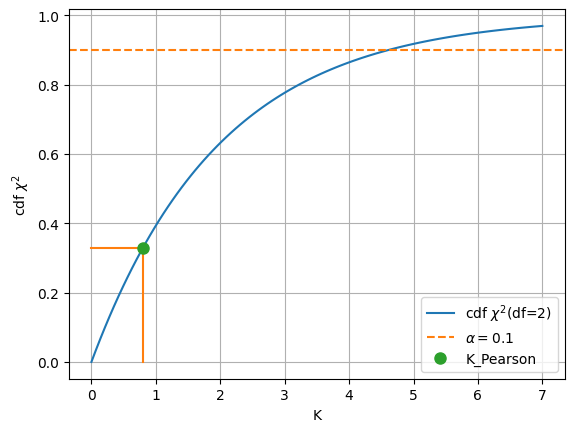

In [ ]:
xx = np.linspace(0, 7, 101)
plt.plot(xx, chi2.cdf(xx, df=2),
 label=r"cdf $\chi^2$(df=2)")
alpha = 0.1
plt.axhline(y=1-alpha, ls='--',
 label=r"$\alpha = %s$"%alpha, color='C1')
plt.plot([K, K, 0],
 [0, chi2.cdf(K, df=2), chi2.cdf(K, df=2)], '-')
plt.plot(K, chi2.cdf(K, df=2), 'o', ms=8, label='K_Pearson')
plt.legend(loc='best')
plt.xlabel('K')
plt.ylabel('cdf $\chi^2$')
plt.grid()

In [ ]:
from scipy.stats import chisquare
statistic, pvalue = chisquare(obs_freq, [exp_freq]*3)
print(statistic, pvalue)

0.8 0.6703200460356394


In [ ]:
chi2.sf(K, df=2)

0.6703200460356394